# Shelby County Testbed - Initial Interdependent Community Description

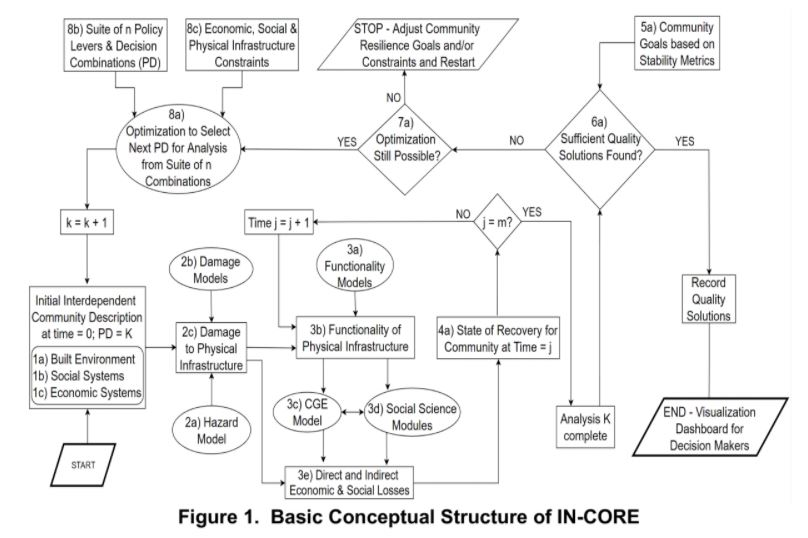

# Basic Conceptual Structure of IN-CORE
Step 1 in IN-CORE is to establish initial interdepent community description at time 0 and with policy levers and decision combinations set to K (baseline case). The community description includes three parts - the built enviroment, social systems, and economic systems. This notebook helps explore the data currently available in IN-CORE for the Shelby County (Memphis MSA) Testbed.

In [1]:
import pandas as pd
import geopandas as gpd # For reading in shapefiles
import numpy as np
import sys # For displaying package versions
import os # For managing directories and file paths if drive is mounted

from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService
from pyincore.analyses.buildingdamage.buildingdamage import BuildingDamage

from pyincore_viz.geoutil import GeoUtil as viz

# Functions for visualizing the population data results as tables
from pyincore_viz.analysis.popresultstable import PopResultsTable as poptable

In [2]:
# Check package versions - good practice for replication
print("Python Version ",sys.version)
print("pandas version: ", pd.__version__)
print("numpy version: ", np.__version__)

Python Version  3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:22:46) [MSC v.1916 64 bit (AMD64)]
pandas version:  1.4.0
numpy version:  1.22.2


In [3]:
# Check working directory - good practice for relative path access
os.getcwd()

'c:\\MyProjects\\HRRCProjects\\IN-CORE\\WorkNPR\\github\\IN-CORE_notebooks'

In [4]:
client = IncoreClient()
# IN-CORE caches files on the local machine, it might be necessary to clear the memory
#client.clear_cache() 

Connection successful to IN-CORE services. pyIncore version detected: 1.3.0


In [5]:
# create data_service object for loading files
data_service = DataService(client)

## 1a) Built enviroment: Building Inventory

The building inventory for Memphis MSA (Shelby County) consists of...

In [6]:
# Memphis Building Inventory v5
bldg_inv_id = "5a284f0bc7d30d13bc081a46"
# load building inventory
bldg_inv = Dataset.from_data_service(bldg_inv_id, data_service)
filename = bldg_inv.get_file_path('shp')
print("The IN-CORE Dataservice has saved the Building Inventory on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Building Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\5a284f0bc7d30d13bc081a46\all_bldgs_ver5_Project\all_bldgs_ver5_Project.shp


In [7]:
bldg_inv_gdf = gpd.read_file(filename)

In [8]:
from pyproj import CRS
crs_4326 = CRS('epsg:4326')
bldg_inv_gdf = bldg_inv_gdf.to_crs(crs_4326)
bldg_inv_gdf.head()

,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,b_stories,bsmt_type,...,dgn_lvl,cont_val,efacility,dwell_unit,str_typ2,occ_typ2,tract_id,guid,IMPUTED,geometry
0,038035 00019,038035 00019_1,038035 00019_1_1,URM,0.02633,1920,1,1,0,CRAWL=0-24%,...,Pre - Code,46707,FALSE,1,URML,RES1,47157001300,64124791-1502-48ea-81b6-1992855f45d5,F,POINT (-89.94883 35.15122)
1,038034 00040,038034 00040_1,038034 00040_1_1,W1,0.97366,1947,1,1,0,CRAWL=0-24%,...,Low - Code,39656,FALSE,1,W1,RES1,47157001300,d04da316-7cba-4964-8104-f0edfde18239,F,POINT (-89.95095 35.15284)
2,038028 00023,038028 00023_1,038028 00023_1_1,W1,0.97366,1900,1,1,0,CRAWL=0-24%,...,Low - Code,37765,FALSE,1,W1,RES1,47157001300,c24d708d-a21b-416f-8772-965548407231,F,POINT (-89.95022 35.15976)
3,034011 00008,034011 00008_1,034011 00008_1_1,W1,0.97366,1926,1,1,0,CRAWL=0-24%,...,Low - Code,59930,FALSE,1,W1,RES1,47157005700,6ff63801-3bf4-4bf3-b6e5-ff9d5fe6f0d0,F,POINT (-90.04844 35.10446)
4,034011 00007,034011 00007_1,034011 00007_1_1,W1,0.97366,1926,1,1,0,CRAWL=0-24%,...,Low - Code,65276,FALSE,1,W1,RES1,47157005700,ef25f515-4109-408f-a3d4-3b79da49edd0,F,POINT (-90.04843 35.10459)


In [9]:
bldg_inv_gdf.columns

Index(['parid', 'parid_card', 'bldg_id', 'struct_typ', 'str_prob',
       'year_built', 'no_stories', 'a_stories', 'b_stories', 'bsmt_type',
       'sq_foot', 'gsq_foot', 'occ_type', 'occ_detail', 'major_occ',
       'broad_occ', 'appr_bldg', 'repl_cst', 'str_cst', 'nstra_cst',
       'nstrd_cst', 'dgn_lvl', 'cont_val', 'efacility', 'dwell_unit',
       'str_typ2', 'occ_typ2', 'tract_id', 'guid', 'IMPUTED', 'geometry'],
      dtype='object')

In [10]:
bldg_inv_gdf[['guid','struct_typ','year_built','occ_type']].head()

,guid,struct_typ,year_built,occ_type
0,64124791-1502-48ea-81b6-1992855f45d5,URM,1920,RES1
1,d04da316-7cba-4964-8104-f0edfde18239,W1,1947,RES1
2,c24d708d-a21b-416f-8772-965548407231,W1,1900,RES1
3,6ff63801-3bf4-4bf3-b6e5-ff9d5fe6f0d0,W1,1926,RES1
4,ef25f515-4109-408f-a3d4-3b79da49edd0,W1,1926,RES1


In [11]:
bldg_inv_gdf[['guid','struct_typ','year_built','occ_type']].groupby('struct_typ').count()

,guid,year_built,occ_type
struct_typ,,,
C1,913,913,913
C2,81,81,81
MH,43,43,43
PC1,1110,1110,1110
PC2,35,35,35
RM,1600,1600,1600
S1,3608,3608,3608
S3,3522,3522,3522
URM,11141,11141,11141


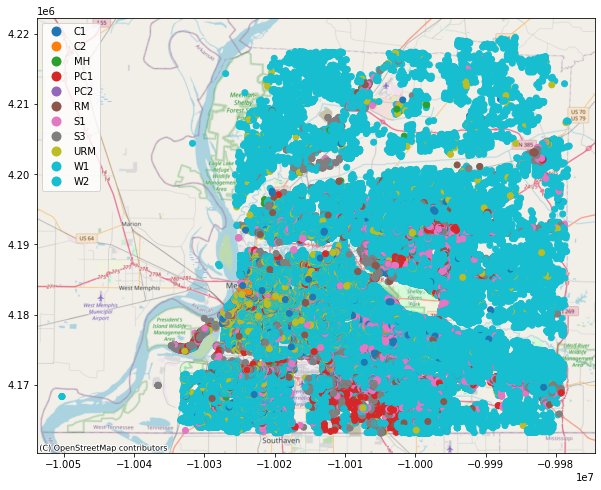

In [12]:
map = viz.plot_gdf_map(bldg_inv_gdf,column='struct_typ', category=True)
map

## 1b) Social Systems: Housing Unit Inventory

The housing unit inventory includes characteristics for individual households and housing units that can be linked to residential buildings. 
For more information see:
>Rosenheim, Nathanael, Roberto Guidotti, Paolo Gardoni & Walter Gillis Peacock. (2019). Integration of detailed household and housing unit characteristic data with critical infrastructure for post-hazard resilience modeling. Sustainable and Resilient Infrastructure. https://doi.org/10.1080/23789689.2019.1681821


>Rosenheim, Nathanael (2021) “Detailed Household and Housing Unit Characteristics: Alpha Release of Housing Unit Inventories.” DesignSafe-CI. https://doi.org/10.17603/ds2-jwf6-s535.

In [13]:
# Housing Unit Inventory
housing_unit_inv_id = "621cec65e894891aafd17890"
# load housing unit inventory as pandas dataframe
housing_unit_inv = Dataset.from_data_service(housing_unit_inv_id, data_service)
filename = housing_unit_inv.get_file_path('csv')
print("The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\621cec65e894891aafd17890\hui_v0-1-0_Shelby_TN_2010_rs1000\hui_v0-1-0_Shelby_TN_2010_rs1000.csv


In [14]:
housing_unit_inv_df = pd.read_csv(filename, header="infer")
housing_unit_inv_df.head()

,huid,blockid,bgid,tractid,FIPScounty,numprec,ownershp,race,hispan,family,vacancy,gqtype,incomegroup,hhinc,randincome,poverty
0,B471570001001020H001,471570001001020,471570001001,47157000100,47157,1,2.0,1.0,0.0,0.0,0,0,8,3,41459.0,0.0
1,B471570001001020H002,471570001001020,471570001001,47157000100,47157,1,2.0,1.0,0.0,0.0,0,0,13,5,104695.0,0.0
2,B471570001001020H003,471570001001020,471570001001,47157000100,47157,1,2.0,1.0,0.0,0.0,0,0,1,1,6215.0,1.0
3,B471570001001020H004,471570001001020,471570001001,47157000100,47157,1,2.0,1.0,0.0,0.0,0,0,10,3,53776.0,0.0
4,B471570001001020H005,471570001001020,471570001001,47157000100,47157,1,2.0,1.0,0.0,0.0,0,0,11,3,62398.0,0.0


In [15]:
housing_unit_inv_df.columns

Index(['huid', 'blockid', 'bgid', 'tractid', 'FIPScounty', 'numprec',
       'ownershp', 'race', 'hispan', 'family', 'vacancy', 'gqtype',
       'incomegroup', 'hhinc', 'randincome', 'poverty'],
      dtype='object')

### Explore Housing Unit Characteristics
The housing unit inventory includes characteristics based on the 2010 Decennial Census. 

### Race and Ethnicity
The housing unit inventory includes variables for race and ethnicity.

In [16]:
poptable.pop_results_table(housing_unit_inv_df, 
                  who = "Total Population by Householder", 
                  what = "by Race, Ethnicity",
                  where = "Shelby County TN",
                  when = "2010",
                  row_index = "Race Ethnicity",
                  col_index = 'Tenure Status')

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Population by Householder (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","281,938 (50.8%)","75,664 (21.8%)","357,602 (39.6%)"
"2 Black alone, Not Hispanic","234,038 (42.2%)","231,080 (66.5%)","465,118 (51.6%)"
"3 American Indian and Alaska Native alone, Not Hispanic",939 (0.2%),734 (0.2%),"1,673 (0.2%)"
"4 Asian alone, Not Hispanic","13,916 (2.5%)","6,231 (1.8%)","20,147 (2.2%)"
"5 Other Race, Not Hispanic","4,432 (0.8%)","3,682 (1.1%)","8,114 (0.9%)"
"6 Any Race, Hispanic","19,206 (3.5%)","30,172 (8.7%)","49,378 (5.5%)"
Total,"554,469 (100.0%)","347,563 (100.0%)","902,032 (100.0%)"


## 1a + 1b) Interdependent Community Description

Explore building inventory and social systems. Specifically look at how the building inventory connects with the housing unit inventory using the housing unit allocation.
The housing unit allocation method will provide detail demographic characteristics for the community allocated to each structure.

To run the HUA Algorithm, three input datasets are required:

1. Housing Unit Inventory - Based on 2010 US Census Block Level Data

2. Address Point Inventory - A list of all possible residential/business address points in a community. Address points are the link between buildings and housing units.

3. Building Inventory - A list of all buildings within a community.


### Set Up and Run Housing Unit Allocation

The bulding and housing unit inventories have already by loaded. The address point inventory is needed to link the population with the structures.

In [17]:
# Housing unit and Building Inventories have been loaded
# Address point inventory
address_point_inv_id = "5e388d9a56c00f0008eb0e6f"
# load housing unit inventory as pandas dataframe
address_point_inv = Dataset.from_data_service(address_point_inv_id, data_service)
filename = address_point_inv.get_file_path('csv')
print("The IN-CORE Dataservice has saved the Address Point Inventory on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Address Point Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\5e388d9a56c00f0008eb0e6f\IN-CORE_2dv3_AddressPointInventory_2020-01-22_strctid\IN-CORE_2dv3_AddressPointInventory_2020-01-22_strctid.csv


In [18]:
address_point_inv_df = pd.read_csv(filename)
address_point_inv_df.head()

,addrptid,guid,parid,blockid,blockidstr,PLCNAME10,PLCGEOID10,COUNTYFP10,geometry,huestimate,residential,bldgobs,flag_ap,occ_type,strctid
0,ST64124791-1502-48ea-81b6-1992855f45d5AP000000,64124791-1502-48ea-81b6-1992855f45d5,038035 00019,4.715700e+14,CB471570013004014,Memphis,4748000.0,157.0,POINT (-89.94883013563857 35.15122337801059),2.0,1,1,0,RES1,64124791-1502-48ea-81b6-1992855f45d5
1,ST64124791-1502-48ea-81b6-1992855f45d5AP000001,64124791-1502-48ea-81b6-1992855f45d5,038035 00019,4.715700e+14,CB471570013004014,Memphis,4748000.0,157.0,POINT (-89.94883013563857 35.15122337801059),2.0,1,0,0,RES1,64124791-1502-48ea-81b6-1992855f45d5
2,ST41058c4d-b10e-4e90-8727-01b01e435809AP000000,41058c4d-b10e-4e90-8727-01b01e435809,038035 00014,4.715700e+14,CB471570013004014,Memphis,4748000.0,157.0,POINT (-89.94873454032344 35.15177243845239),2.0,1,1,0,RES1,41058c4d-b10e-4e90-8727-01b01e435809
3,ST41058c4d-b10e-4e90-8727-01b01e435809AP000001,41058c4d-b10e-4e90-8727-01b01e435809,038035 00014,4.715700e+14,CB471570013004014,Memphis,4748000.0,157.0,POINT (-89.94873454032344 35.15177243845239),2.0,1,0,0,RES1,41058c4d-b10e-4e90-8727-01b01e435809
4,ST5a6948d0-fdfe-4cf2-9409-2f3d8dd63462AP000000,5a6948d0-fdfe-4cf2-9409-2f3d8dd63462,038035 00013,4.715700e+14,CB471570013004014,Memphis,4748000.0,157.0,POINT (-89.94898741517316 35.15177271155782),2.0,1,1,0,RES1,5a6948d0-fdfe-4cf2-9409-2f3d8dd63462


### Building Inventory Shapefile is missing Structure ID
Structure ID is required to link the address point and building inventories

In [19]:
bldg_inv_gdf['strctid'] = bldg_inv_gdf['guid']

In [20]:
bldg_inv_gdf.to_file('IN-CORE_MMSA_BuildingInventory_2021-04-21.shp')

C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20220211\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [21]:
# Temporary Building Inventory v6
building_inv = Dataset.from_file("IN-CORE_MMSA_BuildingInventory_2021-04-21.shp", 
            data_type='ergo:buildingInventoryVer6')

In [22]:
from pyincore.analyses.housingunitallocation import HousingUnitAllocation

# Create housing allocation 
hua = HousingUnitAllocation(client)

# Load input dataset
hua.load_remote_input_dataset("housing_unit_inventory", housing_unit_inv_id)
hua.load_remote_input_dataset("address_point_inventory", address_point_inv_id)
#hua.load_remote_input_dataset("buildings", bldg_inv_id)
hua.set_input_dataset("buildings", building_inv)

# Specify the result name
result_name = "Shelby_HUA"

seed = 1238
iterations = 1

# Set analysis parameters
hua.set_parameter("result_name", result_name)
hua.set_parameter("seed", seed)
hua.set_parameter("iterations", iterations)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

In [23]:
# Run Housing unit allocation analysis
hua.run_analysis()

True

### Explore results from Housing Unit Allocation

In [24]:
# Retrieve result dataset
hua_result = hua.get_output_dataset("result")

# Convert dataset to Pandas DataFrame
hua_df = hua_result.get_dataframe_from_csv(low_memory=False)

# Display top 5 rows of output data
hua_df[['guid','numprec','geometry','aphumerge']].head()

,guid,numprec,geometry,aphumerge
0,e45edbfc-70c2-4145-b3a4-4ccd71396cd9,1.0,POINT (-90.04460246508066 35.18262888751426),both
1,e45edbfc-70c2-4145-b3a4-4ccd71396cd9,1.0,POINT (-90.04460246508066 35.18262888751426),both
2,a276aa74-23e7-412b-8c64-e23a73802117,1.0,POINT (-90.04454689205906 35.18246772882015),both
3,a276aa74-23e7-412b-8c64-e23a73802117,1.0,POINT (-90.04454689205906 35.18246772882015),both
4,6e91c1c9-56a9-48ff-8ae0-ec119f939f78,1.0,POINT (-90.04516338744793 35.18464348268142),both


In [25]:
hua_df.guid.describe()

count                                   532742
unique                                  306003
top       8ec675d6-c284-4891-968d-5fbd60f7f283
freq                                       514
Name: guid, dtype: object

In [26]:
hua_df.huid.describe()

count                   398465
unique                  398465
top       B471570001001002H004
freq                         1
Name: huid, dtype: object

In [27]:
hua_df.columns

Index(['addrptid', 'parid_card', 'bldg_id', 'struct_typ', 'str_prob',
       'year_built', 'no_stories', 'a_stories', 'b_stories', 'bsmt_type',
       'sq_foot', 'gsq_foot', 'occ_detail', 'major_occ', 'broad_occ',
       'appr_bldg', 'repl_cst', 'str_cst', 'nstra_cst', 'nstrd_cst', 'dgn_lvl',
       'cont_val', 'efacility', 'dwell_unit', 'str_typ2', 'occ_typ2',
       'tract_id', 'IMPUTED', 'strctid', 'blockid', 'blockidstr', 'PLCNAME10',
       'PLCGEOID10', 'COUNTYFP10', 'huestimate', 'residential', 'bldgobs',
       'flag_ap', 'parid', 'occ_type', 'guid', 'randomap', 'randommergeorder',
       'huid', 'bgid', 'tractid', 'FIPScounty', 'numprec', 'ownershp', 'race',
       'hispan', 'family', 'vacancy', 'gqtype', 'incomegroup', 'hhinc',
       'randincome', 'poverty', 'randomhu', 'aphumerge', 'geometry'],
      dtype='object')

In [38]:
poptable.pop_results_table(hua_df.loc[~(hua_df['guid'].isna())].copy(), 
                  who = "Total Population by Householder", 
                  what = "by Race, Ethnicity and Tenure for households with Building Data",
                  where = "Shelby County TN",
                  when = "2010",
                  row_index = "Race Ethnicity",
                  col_index = 'Tenure Status')

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Population by Householder (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","279,384 (50.8%)","67,462 (21.9%)","346,846 (40.4%)"
"2 Black alone, Not Hispanic","233,066 (42.4%)","205,335 (66.6%)","438,401 (51.1%)"
"3 American Indian and Alaska Native alone, Not Hispanic",923 (0.2%),629 (0.2%),"1,552 (0.2%)"
"4 Asian alone, Not Hispanic","13,741 (2.5%)","4,605 (1.5%)","18,346 (2.1%)"
"5 Other Race, Not Hispanic","4,388 (0.8%)","3,276 (1.1%)","7,664 (0.9%)"
"6 Any Race, Hispanic","18,145 (3.3%)","26,858 (8.7%)","45,003 (5.2%)"
Total,"549,647 (100.0%)","308,165 (100.0%)","857,812 (100.0%)"


In [40]:
poptable.pop_results_table(hua_df.loc[(hua_df['guid'].isna())].copy(), 
                  who = "Total Population by Householder", 
                  what = "by Race, Ethnicity and Tenure for households without Building Data",
                  where = "Shelby County TN",
                  when = "2010",
                  row_index = "Race Ethnicity",
                  col_index = 'Tenure Status')

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Population by Householder (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","2,554 (53.0%)","8,202 (20.8%)","10,756 (24.3%)"
"2 Black alone, Not Hispanic",972 (20.2%),"25,745 (65.3%)","26,717 (60.4%)"
"3 American Indian and Alaska Native alone, Not Hispanic",16 (0.3%),105 (0.3%),121 (0.3%)
"4 Asian alone, Not Hispanic",175 (3.6%),"1,626 (4.1%)","1,801 (4.1%)"
"5 Other Race, Not Hispanic",44 (0.9%),406 (1.0%),450 (1.0%)
"6 Any Race, Hispanic","1,061 (22.0%)","3,314 (8.4%)","4,375 (9.9%)"
Total,"4,822 (100.0%)","39,398 (100.0%)","44,220 (100.0%)"


In [47]:
def add_hhinc_to_pop_df(df):
        """add household income groups to Pop dataframe.
        Args:
            df (obj): Pandas DataFrame object.
        Returns:
            object: Pandas DataFrame object.
        """

        df['Income Group'] = "0 NA"
        df['Income Group'].notes = "Identify Household Income Groups"

        df.loc[(df['hhinc'] == 1), 'Income Group'] = "1. less than $15k"
        df.loc[(df['hhinc'] == 2), 'Income Group'] = "2. $15k to $25k"
        df.loc[(df['hhinc'] == 3), 'Income Group'] = "3. $25k to $75k"
        df.loc[(df['hhinc'] == 4), 'Income Group'] = "4. $75k to $100k"
        df.loc[(df['hhinc'] == 5), 'Income Group'] = "5. $100k or more"
        # Set variable to missing if structure is occupied - makes tables look nicer
        df.loc[(df['Income Group'] == "0 NA"), 'Income Group'] = np.nan

        return df

In [48]:
hua_df = add_hhinc_to_pop_df(hua_df)
poptable.pop_results_table(hua_df.copy(), 
                  who = "Total Population by Householder", 
                  what = "by Income Groups and Race, Ethnicity",
                  where = "Shelby County TN",
                  when = "2010",
                  row_index = "Race Ethnicity",
                  col_index = 'Income Group')

Income Group,1. less than $15k (%),2. $15k to $25k (%),3. $25k to $75k (%),4. $75k to $100k (%),5. $100k or more (%),Total Population by Householder (%)
Race Ethnicity,,,,,,
"1 White alone, Not Hispanic","23,042 (17.4%)","22,718 (22.1%)","134,681 (35.2%)","51,068 (50.8%)","126,093 (68.4%)","357,602 (39.6%)"
"2 Black alone, Not Hispanic","96,649 (73.0%)","69,020 (67.3%)","212,600 (55.6%)","41,275 (41.0%)","45,574 (24.7%)","465,118 (51.6%)"
"3 American Indian and Alaska Native alone, Not Hispanic",305 (0.2%),194 (0.2%),794 (0.2%),205 (0.2%),175 (0.1%),"1,673 (0.2%)"
"4 Asian alone, Not Hispanic","1,220 (0.9%)","1,394 (1.4%)","6,744 (1.8%)","3,847 (3.8%)","6,942 (3.8%)","20,147 (2.2%)"
"5 Other Race, Not Hispanic","1,802 (1.4%)",966 (0.9%),"3,459 (0.9%)",559 (0.6%),"1,328 (0.7%)","8,114 (0.9%)"
"6 Any Race, Hispanic","9,358 (7.1%)","8,286 (8.1%)","23,980 (6.3%)","3,629 (3.6%)","4,125 (2.2%)","49,378 (5.5%)"
Total,"132,376 (100.0%)","102,578 (100.0%)","382,258 (100.0%)","100,583 (100.0%)","184,237 (100.0%)","902,032 (100.0%)"


In [30]:
hua_df['PLCNAME10'].describe()

count      557400
unique          8
top       Memphis
freq       406714
Name: PLCNAME10, dtype: object

In [31]:
poptable.pop_results_table(hua_df.loc[hua_df['PLCNAME10']=='Memphis'].copy(), 
                  who = "Total Population by Householder", 
                  what = "by Race, Ethnicity",
                  where = "Memphis TN",
                  when = "2010",
                  row_index = "Race Ethnicity",
                  col_index = 'Tenure Status')

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Population by Householder (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","122,573 (37.8%)","52,737 (17.6%)","175,310 (28.1%)"
"2 Black alone, Not Hispanic","180,487 (55.6%)","212,094 (70.8%)","392,581 (62.9%)"
"3 American Indian and Alaska Native alone, Not Hispanic",496 (0.2%),615 (0.2%),"1,111 (0.2%)"
"4 Asian alone, Not Hispanic","5,766 (1.8%)","3,714 (1.2%)","9,480 (1.5%)"
"5 Other Race, Not Hispanic","2,424 (0.7%)","3,021 (1.0%)","5,445 (0.9%)"
"6 Any Race, Hispanic","12,738 (3.9%)","27,507 (9.2%)","40,245 (6.4%)"
Total,"324,484 (100.0%)","299,688 (100.0%)","624,172 (100.0%)"


#### Validate the Housing Unit Allocation has worked
Notice that the population count totals for the community should match (pretty closely) data collected for the 2010 Decennial Census.
This can be confirmed by going to data.census.gov

Total Population by Race and Ethnicity:
https://data.census.gov/cedsci/table?q=DECENNIALPL2010.P5&g=0500000US47157&tid=DECENNIALSF12010.P5

Differences in the housing unit allocation and the Census count may be due to differences between political boundaries and the building inventory. See Rosenheim et al 2019 for more details.

The housing unit allocation, plus the building results will become the input for the social science models such as the population dislocatoin model.

### Setup Housing Unit Inventory allocated to buildings for mapping

In [32]:
# Select housing units with building id
hua_df_withguid = hua_df.loc[~(hua_df['guid'].isna())].copy()

In [33]:
# Use shapely.wkt loads to convert WKT to GeoSeries
from shapely import wkt

hua_df_withguid['geometry'] = gpd.GeoSeries.from_wkt(hua_df_withguid['geometry'])

# Geodata frame requires geometry and CRS to be set
crs_4326 = CRS('epsg:4326')
hua_gdf = gpd.GeoDataFrame(
    hua_df_withguid,
    crs=crs_4326,
    geometry='geometry')

In [34]:
# Add race ethnicity string
hua_gdf = poptable.add_race_ethnicity_to_pop_df(hua_gdf)

In [35]:
hua_gdf[['guid','ownershp','geometry','Race Ethnicity']].head(6)

,guid,ownershp,geometry,Race Ethnicity
0,e45edbfc-70c2-4145-b3a4-4ccd71396cd9,2.0,POINT (-90.04460 35.18263),"2 Black alone, Not Hispanic"
1,e45edbfc-70c2-4145-b3a4-4ccd71396cd9,2.0,POINT (-90.04460 35.18263),"2 Black alone, Not Hispanic"
2,a276aa74-23e7-412b-8c64-e23a73802117,2.0,POINT (-90.04455 35.18247),"2 Black alone, Not Hispanic"
3,a276aa74-23e7-412b-8c64-e23a73802117,2.0,POINT (-90.04455 35.18247),"2 Black alone, Not Hispanic"
4,6e91c1c9-56a9-48ff-8ae0-ec119f939f78,1.0,POINT (-90.04516 35.18464),"2 Black alone, Not Hispanic"
5,5e1ce534-d3c4-41d7-8de1-b2effdce5761,NaN,POINT (-90.04505 35.18436),NaN


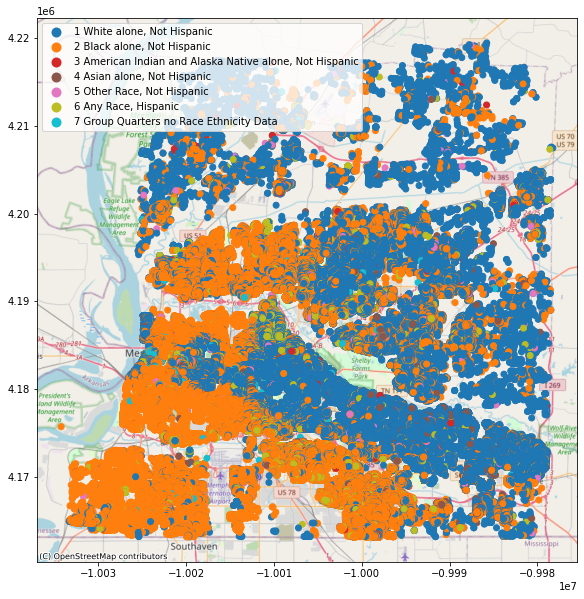

In [36]:
# visualize population
gdf = hua_gdf
map = viz.plot_gdf_map(gdf,column='Race Ethnicity', category=True)
map